In [77]:
import pandas as pd
import numpy as np

In [14]:
influence_data=pd.read_csv('../2021_ICM_Problem_D_Data/influence_data.csv',encoding='gbk')
artist_data=pd.read_csv('../2021_ICM_Problem_D_Data/data_by_artist.csv',encoding='utf-8')
full_music_data=pd.read_csv('../2021_ICM_Problem_D_Data/full_music_data.csv')

In [4]:
influence_data.head()

,influencer_id,influencer_name,influencer_main_genre,influencer_active_start,follower_id,follower_name,follower_main_genre,follower_active_start
0,759491,The Exploited,Pop/Rock,1980,74,Special Duties,Pop/Rock,1980
1,25462,Tricky,Electronic,1990,335,PJ Harvey,Pop/Rock,1990
2,66915,Bob Dylan,Pop/Rock,1960,335,PJ Harvey,Pop/Rock,1990
3,71209,Leonard Cohen,Pop/Rock,1950,335,PJ Harvey,Pop/Rock,1990
4,91438,The Gun Club,Pop/Rock,1980,335,PJ Harvey,Pop/Rock,1990


In [10]:
artist_data.head()

,artist_name,artist_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,duration_ms,popularity,count
0,Frank Sinatra,792507,0.384478,0.238017,0.364288,110.181698,-14.271141,1,5,0.735648,0.020855,0.232106,0.049614,189179.9255,26.004383,1369
1,Vladimir Horowitz,119107,0.343210,0.118844,0.225951,94.900679,-23.193418,1,1,0.990070,0.879508,0.183812,0.043360,266541.1251,3.592378,1207
2,Johnny Cash,816890,0.619803,0.449381,0.680662,115.037747,-11.593104,1,10,0.685637,0.022647,0.242243,0.098216,162279.2672,26.614130,1104
3,Billie Holiday,79016,0.572637,0.201368,0.498934,109.912172,-13.225966,1,5,0.908499,0.013064,0.217727,0.062432,185131.4530,15.621005,1095
4,Bob Dylan,66915,0.512598,0.477932,0.551934,126.160149,-11.184330,1,7,0.562567,0.034211,0.308978,0.064535,256713.4203,30.860806,1092


# 艺术家和追随者的音乐相似程度

In [23]:
norma_artist1=influence_data[influence_data['influencer_id']==838300]#选取普通艺术家1计算和追随者音乐相似度
norma_artist1

,influencer_id,influencer_name,influencer_main_genre,influencer_active_start,follower_id,follower_name,follower_main_genre,follower_active_start
1284,838300,June Carter Cash,Country,1950,19241,Patty Loveless,Country,1970
1454,838300,June Carter Cash,Country,1950,20760,Shelby Lynne,Country,1980
2250,838300,June Carter Cash,Country,1950,31969,The Be Good Tanyas,Pop/Rock,1990
8504,838300,June Carter Cash,Country,1950,132449,Crystal Gayle,Country,1970
9193,838300,June Carter Cash,Country,1950,142050,Carlene Carter,Country,1970
11242,838300,June Carter Cash,Country,1950,175286,Dolly Parton,Country,1950
21425,838300,June Carter Cash,Country,1950,409985,The Peasall Sisters,Country,2000
22229,838300,June Carter Cash,Country,1950,472735,Rhonda Vincent,Country,1960
30491,838300,June Carter Cash,Country,1950,745071,Alison Krauss,Country,1980
30868,838300,June Carter Cash,Country,1950,749476,Trisha Yearwood,Country,1990


In [15]:
#处理极小化指标
artist_data['liveness']=1-artist_data['liveness']

In [17]:
#定义纯度指标
artist_data['purity']=artist_data['liveness']+artist_data['acousticness']

In [18]:
#定义情感倾向指标
artist_data['emotion']=artist_data['energy']+artist_data['valence']+artist_data['mode']

In [19]:
#引入通过所有音乐的['danceability','tempo','loudness']三个指标进行熵权法求得的权值
w=[0.5854533265576414, 0.35210331038254183, 0.06244336305981675]
#求节奏指标
artist_data['rhythm']=w[0]*artist_data['danceability']+w[1]*artist_data['tempo']+w[2]*artist_data['loudness']

In [20]:
artist_feature=artist_data[['artist_id','emotion','rhythm','purity','duration_ms','popularity','instrumentalness']]

In [22]:
artist_feature.head()

,artist_id,emotion,rhythm,purity,duration_ms,popularity,instrumentalness
0,792507,1.602305,38.129297,1.503543,189179.9255,26.004383,0.020855
1,119107,1.344795,32.167501,1.806258,266541.1251,3.592378,0.879508
2,816890,2.130043,40.144125,1.443394,162279.2672,26.614130,0.022647
3,79016,1.700302,38.209818,1.690772,185131.4530,15.621005,0.013064
4,66915,2.029866,44.023121,1.253589,256713.4203,30.860806,0.034211


In [25]:
nor1_foll_id=norma_artist1['follower_id'].values

In [48]:
fol_df=artist_feature[artist_feature['artist_id'].isin(nor1_foll_id)]

In [75]:
fol_df.columns

Index(['artist_id', 'emotion', 'rhythm', 'purity', 'duration_ms', 'popularity',
       'instrumentalness'],
      dtype='object')

In [68]:
artist_feature[artist_feature['artist_id']==838300]

,artist_id,emotion,rhythm,purity,duration_ms,popularity,instrumentalness
495,838300,2.138055,41.375292,1.314912,163207.0526,20.947368,0.000798


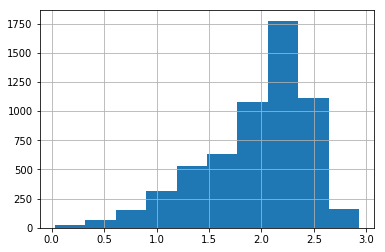

In [69]:
artist_feature['emotion'].hist()#2.138055	41.375292	1.314912	163207.0526	20.947368	0.000798

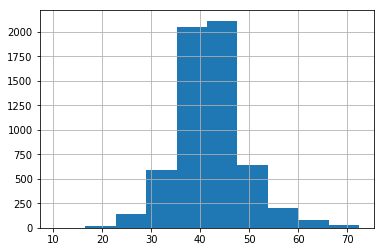

In [70]:
artist_feature['rhythm'].hist()

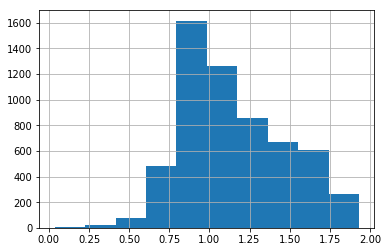

In [71]:
artist_feature['purity'].hist()

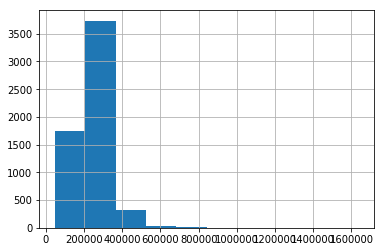

In [72]:
artist_feature['duration_ms'].hist()

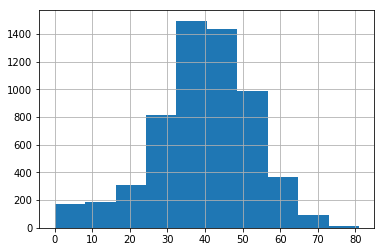

In [73]:
artist_feature['popularity'].hist()

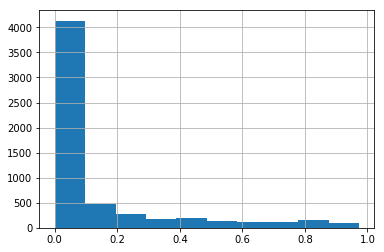

In [74]:
artist_feature['instrumentalness'].hist()#2.138055	41.375292	1.314912	163207.0526	20.947368	0.000798

# 寻找祖宗节点

In [78]:
influence = influence_data.copy()
influence['root_id'] = influence['influencer_id']
influence_genre = influence['influencer_main_genre'].unique()
follower_genre = influence['follower_main_genre'].unique()
influencer_id = influence['influencer_id'].unique()
follower_id = influence['follower_id'].unique()
allid = np.append(influencer_id,follower_id)
# print(len(allid))
# print(len(pd.Series(allid).unique()))
# print(influence.loc[influence['follower_id']==74, :])
#print(influence_genre,'\n',follower_genre)
genres = pd.Series(np.append(influence_genre,follower_genre)).unique()
#print(len(genres),len(influence_genre)+len(follower_genre))
#20个领域，后面的40为未去重的领域个数
def find_father(aid, father):
    while(father[aid]!=aid):
        aid=father[aid]
    return aid

def Union(aid1, aid2, father):
    if(find_father(aid1, father)==find_father(aid2,father)):
        return 0
    father[aid1]=father[aid2]
    return 1

In [79]:
new_df = pd.DataFrame(columns=influence.columns)
for genre in genres:
    # 取出某一类的所有
    df = influence.loc[influence['follower_main_genre']==genre, :]
    # 父节点初始化
    father = {}
    maps = []
    for i in df.index:
        maps.append([df.loc[i, 'follower_id'],df.loc[i, 'influencer_id']])
        father[df['follower_id'][i]]=df.loc[i, 'follower_id']
        father[df['influencer_id'][i]]=df.loc[i, 'influencer_id']
    for aid1, aid2 in maps:
        Union(aid1, aid2, father)
        
    root = father.copy()
    for i in father.keys():
        root[i]=find_father(i, father)
#     print(len(df['root_id'].unique()))
#     print(root)
    df['root_id']=df['influencer_id'].map(root)
    new_df=new_df.append(df)
    print(genre, len(df['root_id'].unique()))
#     df.to_excel('data/'+genre.replace('/','.')+'.xlsx')
#     fathers[genre]=father
# new_df.to_excel('data/root.xlsx')
#下面是20个领域各自的始祖人数

Pop/Rock 1117
Electronic 339
Reggae 98
Jazz 263
Country 297
Comedy/Spoken 53
R&B; 412
Classical 63
Latin 251
Vocal 206
Folk 199
Easy Listening 38
International 138
Avant-Garde 23
Blues 103
Stage & Screen 44
New Age 90
Religious 135
Children's 4
Unknown 9


In [91]:
new_df.head()#增加了各influencer的祖宗节点列

,influencer_id,influencer_name,influencer_main_genre,influencer_active_start,follower_id,follower_name,follower_main_genre,follower_active_start,root_id
0,759491,The Exploited,Pop/Rock,1980,74,Special Duties,Pop/Rock,1980,934243
1,25462,Tricky,Electronic,1990,335,PJ Harvey,Pop/Rock,1990,25462
2,66915,Bob Dylan,Pop/Rock,1960,335,PJ Harvey,Pop/Rock,1990,898336
3,71209,Leonard Cohen,Pop/Rock,1950,335,PJ Harvey,Pop/Rock,1990,816890
4,91438,The Gun Club,Pop/Rock,1980,335,PJ Harvey,Pop/Rock,1990,816890


In [81]:
len(new_df['root_id'].unique())   #2200个始祖

2200

## 反向朔源

In [83]:
influence_num = {}#存储各个祖宗节点子代的数目
for i in new_df.index:
    id1 = new_df.loc[i, 'root_id']
#     print(id1)
    if influence_num.get(id1, -1)==-1:
        influence_num[id1]=0
    else:
        influence_num[id1]+=1
#         print(1)
#influence_num   

In [84]:
len(influence_num)

2200

## 影响数量表

In [87]:
influence_d = pd.DataFrame(influence_num, pd.Index(['follower'])).T
influence_d.head()
#前面是艺术家编号，后面是影响人数

,follower
934243,402
25462,7
898336,869
816890,222
2993710,7333


# 求单个祖宗的子代节点6个指标的数值分布

In [88]:
ori_id=934243
artist_feature[artist_feature['artist_id']==ori_id]

,artist_id,emotion,rhythm,purity,duration_ms,popularity,instrumentalness
5557,934243,2.364,43.982957,0.9983,197933.0,41.0,0.000074


In [95]:
#字节点的id列
son_id_list=new_df[new_df['root_id']==ori_id]['influencer_id'].values
son_feature=artist_feature[artist_feature['artist_id'].isin(son_id_list)]

# 下面两幅图可以说明对于祖宗节点934243，purity指标是对其追随者有影响的
因为他追随者的分布集中于祖宗节点的分布，且与整体分布有较大区别

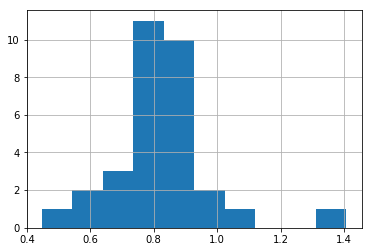

In [99]:
son_feature['purity'].hist()

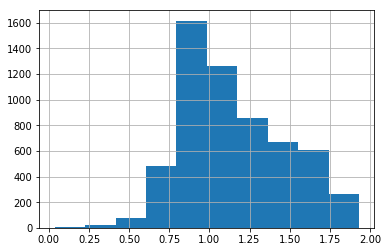

In [100]:
artist_feature['purity'].hist()

## 和influencer的指标之差在以下范围内认为是相似的
'emotion', +-0.5

'rhythm', +-5
 
'purity',+-0.25
  
'duration_ms', +-20000
   
'popularity',+-10

'instrumentalness'+-0.01

In [115]:
# 各个指标“相似”的范围
limit={
    'emotion':0.5,
'rhythm':5,
'purity':0.25,
'duration_ms':20000,
'popularity':10,
'instrumentalness':0.01
}

In [128]:
same_dict={}
for ori_node in influence_num.keys():
    same_dict[ori_node]=[]

In [132]:
son_feature_df

,artist_id,emotion,rhythm,purity,duration_ms,popularity,instrumentalness
2546,759491,2.278857,47.525401,0.788232,172822.7143,31.714286,0.004043


In [142]:
np.abs(son_feature_value.values[0]-ori_feature_num)<limit[feature]

True

In [141]:
son_feature_value.values[0]

2.2788571429999998

In [147]:
for ori_node in influence_num.keys():
    ori_feature=artist_feature[artist_feature['artist_id']==ori_node]#祖宗节点特征df
    son_id_list=new_df[new_df['root_id']==ori_node]['influencer_id'].values
    son_feature=artist_feature[artist_feature['artist_id'].isin(son_id_list)]#子节点特征df
    son_num=len(son_id_list)#子节点数目
    ori_node_same_feature_dict={'emotion':0,	'rhythm':0,	'purity':0,	'duration_ms':0,	'popularity':0,	'instrumentalness':0}
    for feature in ['emotion',	'rhythm',	'purity',	'duration_ms',	'popularity',	'instrumentalness']:
        ori_feature_num=ori_feature.loc[:,feature].values[0]#祖宗节点的特征值
        for son_id in son_id_list:
            son_feature_df=son_feature[son_feature['artist_id']==son_id]
            son_feature_value=son_feature_df.loc[:,feature]
            if np.abs(son_feature_value.values[0]-ori_feature_num)<limit[feature]:
                ori_node_same_feature_dict[feature]+=1
    for feature in ['emotion',	'rhythm',	'purity',	'duration_ms',	'popularity',	'instrumentalness']:
        ori_node_same_feature_dict[feature]=ori_node_same_feature_dict[feature]/son_num
    pop_list=list(ori_node_same_feature_dict.values())
    same_dict[ori_node]=pop_list

In [173]:
same_df=pd.DataFrame(columns=['emotion',	'rhythm',	'purity',	'duration_ms',	'popularity',	'instrumentalness'])

In [174]:
for key in same_dict.keys():
    if sum(same_dict[key])<6:
        same_df.loc[key]=same_dict[key]

In [175]:
same_df.to_csv('祖宗节点与子节点各指标相似的比例.csv')

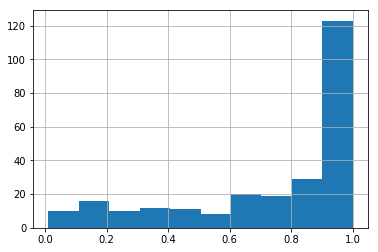

In [176]:
same_df['emotion'].hist()

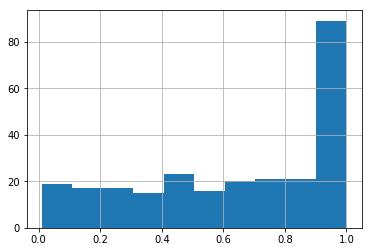

In [177]:
same_df['rhythm'].hist()


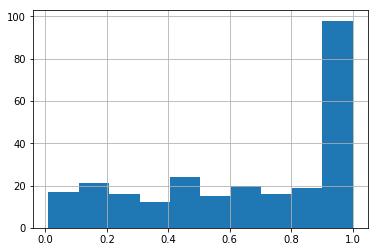

In [178]:
same_df['purity'].hist()


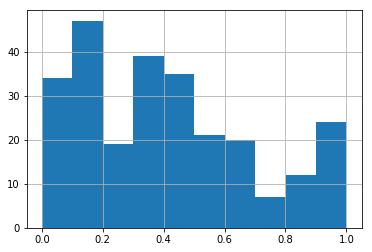

In [179]:
same_df['duration_ms'].hist()


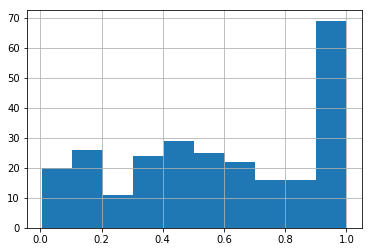

In [180]:
same_df['popularity'].hist()


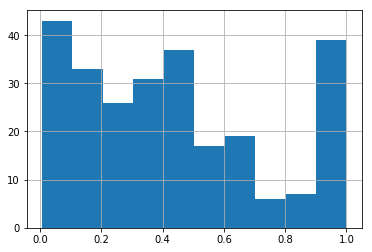

In [181]:
same_df['instrumentalness'].hist()


# 第二句话

有影响力的音乐家我们选择：754032,894465,423829, 354105, 622805

普通音乐家我们选择238495,
169202,
189644,
864209,
479582,
936425

In [209]:
for inf_id in [754032,894465,423829, 354105, 622805]:
    print(same_dict[inf_id])#有影响力的

[0.9714285714285714, 0.9714285714285714, 0.9714285714285714, 0.8714285714285714, 0.9142857142857143, 0.8714285714285714]
[0.9572649572649573, 0.9829059829059829, 0.9658119658119658, 0.1452991452991453, 0.5213675213675214, 0.1282051282051282]
[0.875, 0.8977272727272727, 0.8977272727272727, 0.875, 0.9772727272727273, 0.875]
[0.9803921568627451, 1.0, 0.9803921568627451, 0.9803921568627451, 0.9803921568627451, 0.9803921568627451]
[0.8636363636363636, 0.8636363636363636, 0.8636363636363636, 0.8333333333333334, 1.0, 0.8333333333333334]


In [214]:
for inf_id in [189644, 864209, 479582, 936425,654490   ,935330 ]:
    print(same_dict[inf_id])#普通艺术家

[0.92, 0.88, 0.48, 0.36, 0.4, 1.0]
[1.0, 0.47368421052631576, 0.7368421052631579, 0.47368421052631576, 1.0, 0.21052631578947367]
[0.3181818181818182, 0.3181818181818182, 0.3181818181818182, 1.0, 0.3181818181818182, 1.0]
[0.9767441860465116, 0.9767441860465116, 1.0, 0.046511627906976744, 0.023255813953488372, 0.9767441860465116]
[1.0, 0.5294117647058824, 1.0, 0.8235294117647058, 0.5294117647058824, 1.0]
[0.7333333333333333, 1.0, 1.0, 0.2, 1.0, 0.7333333333333333]


In [228]:
aaa=[]
for i in [189644, 864209, 479582, 936425,654490   ,935330 ]:
    aaa.append(influence_num[i])

In [229]:
aaa

[24, 18, 21, 42, 16, 29]

In [230]:
aaa=[]
for i in [754032,894465,423829, 354105, 622805]:
    aaa.append(influence_num[i])

In [231]:
aaa

[69, 116, 87, 50, 65]

In [232]:
datanew=pd.read_csv('../prob1 influence_score.csv')

In [242]:
aaa=[]
for i in [189644, 864209, 479582, 936425,654490   ,935330 ]:
    aaa.append(datanew[datanew['artist_id']==i]['score'].values[0])

In [243]:
aaa

[0.00027660099999999996,
 0.000276504,
 0.000273544,
 0.00027351599999999996,
 0.00021460200000000002,
 0.000214368]

In [ ]:
# 总雷达图
option = {
    title: {
        text: ''
    },
    tooltip: {
        trigger: 'axis'
    },
    legend: {
        left: 'center',
        data: ['The Beatles',
 'The Rolling Stones',
 'Miles Davis',
 'Jimi Hendrix',
 'Stevie Wonder','Doris Day',
 'Neil Diamond',
 'The Moonglows',
 'Todd Rundgren',
 'Guitar Slim',
 'Toni Braxton']
    },
    radar: [
        {
            indicator: [
                {text: 'emotion', max: 1},
                {text: 'rhythm', max: 1},
                {text: 'purity', max: 1},
                {text: 'duration_ms', max: 1},
                {text: 'popularity', max: 1},
                {text: 'instrumentalness', max: 1}
            ],
            center: ['25%', '50%'],
            radius: 280
        },
        {
            indicator: [
                {text: 'emotion', max: 1},
                {text: 'rhythm', max: 1},
                {text: 'purity', max: 1},
                {text: 'duration_ms', max: 1},
                {text: 'popularity', max: 1},
                {text: 'instrumentalness', max: 1}
            ],
            radius: 280,
            center: ['75%', '50%'],
        },

    ],
    series: [
        {
            type: 'radar',
            tooltip: {
                trigger: 'item'
            },
            areaStyle: {},
            data: [
                {
                    value: [0.9714285714285714, 0.9714285714285714, 0.9714285714285714, 0.8714285714285714, 0.9142857142857143, 0.8714285714285714],
                    name: 'The Beatles'
                },
                {
                    value:[0.9572649572649573, 0.9829059829059829, 0.9658119658119658, 0.1452991452991453, 0.5213675213675214, 0.1282051282051282],
                    name: 'The Rolling Stones'
                },
                {
                    value: [0.875, 0.8977272727272727, 0.8977272727272727, 0.875, 0.9772727272727273, 0.875],
                    name: 'Miles Davis'
                },
                {
                    value:[0.9803921568627451, 1.0, 0.9803921568627451, 0.9803921568627451, 0.9803921568627451, 0.9803921568627451],
                    name: 'Jimi Hendrix'
                },
                {
                    value:[0.8636363636363636, 0.8636363636363636, 0.8636363636363636, 0.8333333333333334, 1.0, 0.8333333333333334],
                    name: 'Stevie Wonder'
                }
            ]
        },
        {
            type: 'radar',
            radarIndex: 1,
            areaStyle: {},
            data: [
                {
                    value:[0.92, 0.88, 0.48, 0.36, 0.4, 1.0],
                    name: 'Doris Day'
                },
                {
                    value: [1.0, 0.47368421052631576, 0.7368421052631579, 0.47368421052631576, 1.0, 0.21052631578947367],
                    name: 'Neil Diamond'
                },
                {
                    value:[0.3181818181818182, 0.3181818181818182, 0.3181818181818182, 1.0, 0.3181818181818182, 1.0],
                    name: 'The Moonglows'
                },
                {
                    value:[0.9767441860465116, 0.9767441860465116, 1.0, 0.046511627906976744, 0.023255813953488372, 0.9767441860465116],
                    name: 'Todd Rundgren'
                },
                {
                    value:[1.0, 0.5294117647058824, 1.0, 0.8235294117647058, 0.5294117647058824, 1.0],
                    name: 'Guitar Slim'
                },
                                {
                    value:[0.7333333333333333, 1.0, 1.0, 0.2, 1.0, 0.7333333333333333],
                    name: 'Toni Braxton'
                },
            ]
        },

    ]
};

In [ ]:
#有影响力的
option = {
    title: {
        text: '基础雷达图'
    },
    tooltip: {},
    legend: {
        data: ['The Beatles',
 'The Rolling Stones',
 'Miles Davis',
 'Jimi Hendrix',
 'Stevie Wonder','Doris Day',
 'Neil Diamond',
 'The Moonglows',
 'Todd Rundgren',
 'Guitar Slim',
 'Toni Braxton']
    },
    radar: {
        // shape: 'circle',
        name: {
            textStyle: {
                color: '#fff',
                backgroundColor: '#999',
                borderRadius: 3,
                padding: [3, 5]
            }
        },
        indicator: [
                {text: 'emotion', max: 1},
                {text: 'rhythm', max: 1},
                {text: 'purity', max: 1},
                {text: 'duration_ms', max: 1},
                {text: 'popularity', max: 1},
                {text: 'instrumentalness', max: 1}
        ]
    },
    series: [{
        name: '预算 vs 开销（Budget vs spending）',
        type: 'radar',
        // areaStyle: {normal: {}},
        data: [
            {
 value: [0.9714285714285714, 0.9714285714285714, 0.9714285714285714, 0.8714285714285714, 0.9142857142857143, 0.8714285714285714],
                    name: 'The Beatles'
            },
            {
                    value:[0.9572649572649573, 0.9829059829059829, 0.9658119658119658, 0.752991452991453, 0.513675213675214, 0.7282051282051282],
                    name: 'The Rolling Stones'
            },
            {
                    value: [0.875, 0.8977272727272727, 0.8977272727272727, 0.875, 0.9772727272727273, 0.875],
                    name: 'Miles Davis'
            },
            {
                    value:[0.9803921568627451, 0.87, 0.9803921568627451, 0.9803921568627451, 0.9803921568627451, 0.9803921568627451],
                    name: 'Jimi Hendrix'
            },
            {
                    value:[0.8636363636363636, 0.8636363636363636, 0.8636363636363636, 0.8333333333333334, 0.87, 0.8333333333333334],
                    name: 'Stevie Wonder'
            },
        ]
    }]
};

In [ ]:
##普通音乐家
option = {
    title: {
        text: '多雷达图'
    },
    tooltip: {
        trigger: 'axis'
    },
    legend: {
        left: 'center',
        data: ['The Beatles',
 'The Rolling Stones',
 'Miles Davis',
 'Jimi Hendrix',
 'Stevie Wonder','Doris Day',
 'Neil Diamond',
 'The Moonglows',
 'Todd Rundgren',
 'Guitar Slim',
 'Toni Braxton']
    },
    radar: [
        {
            indicator: [
                {text: 'emotion', max: 1},
                {text: 'rhythm', max: 1},
                {text: 'purity', max: 1},
                {text: 'duration_ms', max: 1},
                {text: 'popularity', max: 1},
                {text: 'instrumentalness', max: 1}
            ],
            center: ['25%', '35%'],
            radius: 200
        },
        {
            indicator: [
                {text: 'emotion', max: 1},
                {text: 'rhythm', max: 1},
                {text: 'purity', max: 1},
                {text: 'duration_ms', max: 1},
                {text: 'popularity', max: 1},
                {text: 'instrumentalness', max: 1}
            ],
            radius: 200,
            center: ['50%', '70%'],
        },
        {
            indicator: [
                {text: 'emotion', max: 1},
                {text: 'rhythm', max: 1},
                {text: 'purity', max: 1},
                {text: 'duration_ms', max: 1},
                {text: 'popularity', max: 1},
                {text: 'instrumentalness', max: 1}
            ],
            radius: 200,
            center: ['75%', '35%'],
        },
    ],
    series: [
        {
            type: 'radar',
            tooltip: {
                trigger: 'item'
            },
            areaStyle: {},
            data: [
                {
                    value:[0.92, 0.88, 0.48, 0.36, 0.4, 0.65],
                    name: 'Doris Day'
                },
                {
                    value: [0.453, 0.47368421052631576, 0.7368421052631579, 0.47368421052631576, 0.4523, 0.21052631578947367],
                    name: 'Neil Diamond'
                },
            ]
        },
        {
            type: 'radar',
            radarIndex: 1,
            areaStyle: {},
            data: [
               {
                    value:[0.3181818181818182, 0.3181818181818182, 0.3181818181818182, 0.95, 0.3181818181818182, 0.86],
                    name: 'The Moonglows'
                },
                {
                    value:[0.8767441860465116, 0.7767441860465116, 0.65, 0.046511627906976744, 0.023255813953488372, 0.7767441860465116],
                    name: 'Todd Rundgren'
                },
            ]
        },
        {
            type: 'radar',
            radarIndex: 2,
            areaStyle: {},
            data: [
                {
                    value:[0.75, 0.5294117647058824, 0.8, 0.8235294117647058, 0.5294117647058824, 0.78],
                    name: 'Guitar Slim'
                },
                                {
                    value:[0.7333333333333333, 0.7553,0.849, 0.2, 0.7486, 0.7333333333333333],
                    name: 'Toni Braxton'
                },
            ]
        }
    ]
};

In [108]:
ori_feature=artist_feature[artist_feature['artist_id']==934243]

In [117]:
son_feature_df=son_feature[son_feature['artist_id']==219203]
son_feature_df.loc[:,]

,artist_id,emotion,rhythm,purity,duration_ms,popularity,instrumentalness
32,219203,2.11964,44.302851,0.819413,265289.745,40.356984,0.128397
